In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("UpdatedResumeDataSet.csv")

In [3]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.head(20)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
5,Data Science,"SKILLS C Basics, IOT, Python, MATLAB, Data Sci..."
6,Data Science,Skills â¢ Python â¢ Tableau â¢ Data Visuali...
7,Data Science,Education Details \r\n B.Tech Rayat and Bahr...
8,Data Science,Personal Skills â¢ Ability to quickly grasp t...
9,Data Science,Expertise â Data and Quantitative Analysis â...


In [5]:
df.tail(15)

,Category,Resume
947,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
948,Testing,â¢ Good logical and analytical skills â¢ Pos...
949,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...
950,Testing,Computer Skills: â¢ Proficient in MS office (...
951,Testing,â Willingness to accept the challenges. â ...
952,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
953,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
954,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...
955,Testing,â¢ Good logical and analytical skills â¢ Pos...
956,Testing,COMPUTER PROFICIENCY â¢ Basic: MS-Office (Pow...


In [6]:
df.shape

(962, 2)

In [7]:
df.columns

Index(['Category', 'Resume'], dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [10]:
df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [11]:
df.nunique()

Category     25
Resume      166
dtype: int64

In [12]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

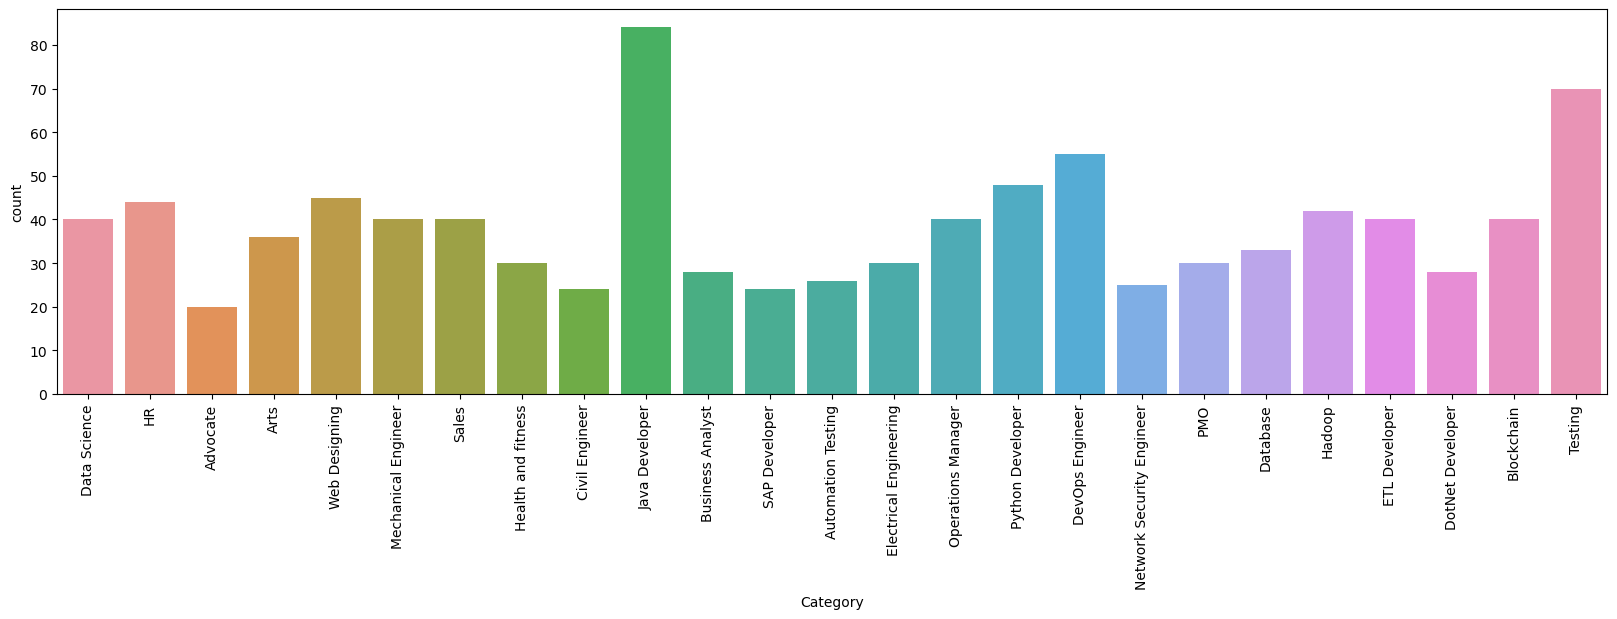

In [13]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df)
plt.show()

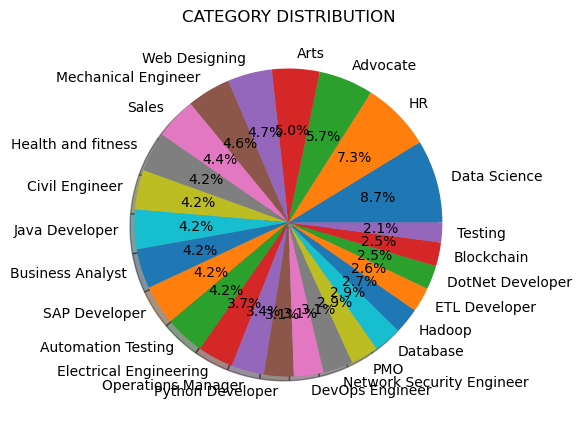

In [14]:
targetCounts = df["Category"].value_counts()
targetLabels = df["Category"].unique()
plt.figure(figsize=(20,5))
plt.pie(targetCounts , labels = targetLabels, autopct='%1.1f%%' , shadow= True)
plt.title("CATEGORY DISTRIBUTION")
plt.show()

In [15]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText) # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText) # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText) # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText) # remove mentions
#     resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ',
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText)
    resumeText = re.sub('\s+', ' ', resumeText) # remove extra whitespace
    return resumeText
                        
df['cleaned_resume'] = df.Resume.apply(lambda x: cleanResume(x))

In [17]:
df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary..."


In [18]:
df.tail()

,Category,Resume,cleaned_resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: Proficient in MS office (Word...
958,Testing,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges. Positive...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS Quick learner, Eagerness to le..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [21]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [26]:
SetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3126), ('Details', 2967), ('description', 2634), ('1', 1837), ('Project', 1701), ('project', 1521), ('data', 1438), ('team', 1409), ('Maharashtra', 1385), ('6', 1369), ('year', 1240), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1012), ('Pune', 1009), ('Management', 979), ('management', 927), ('SQL', 841), ('Engineering', 835), ("'s", 813), ('Developer', 786), ('Ltd', 748), ('monthsCompany', 746), ('development', 738), ('application', 727), ('Pvt', 712), ('System', 705), ('Java', 704), ('reports', 697), ('business', 696), ('requirements', 693), ('various', 688), ('India', 669), ('Education', 654), ('Data', 647), ('University', 645), ('The', 641), ('test', 638), ('Responsibilities', 637), ('testing', 634), ('process', 627), ('Software', 627), ('Technologies', 622), ('work', 622), ('Testing', 610), ('client', 608), ('like', 608)]


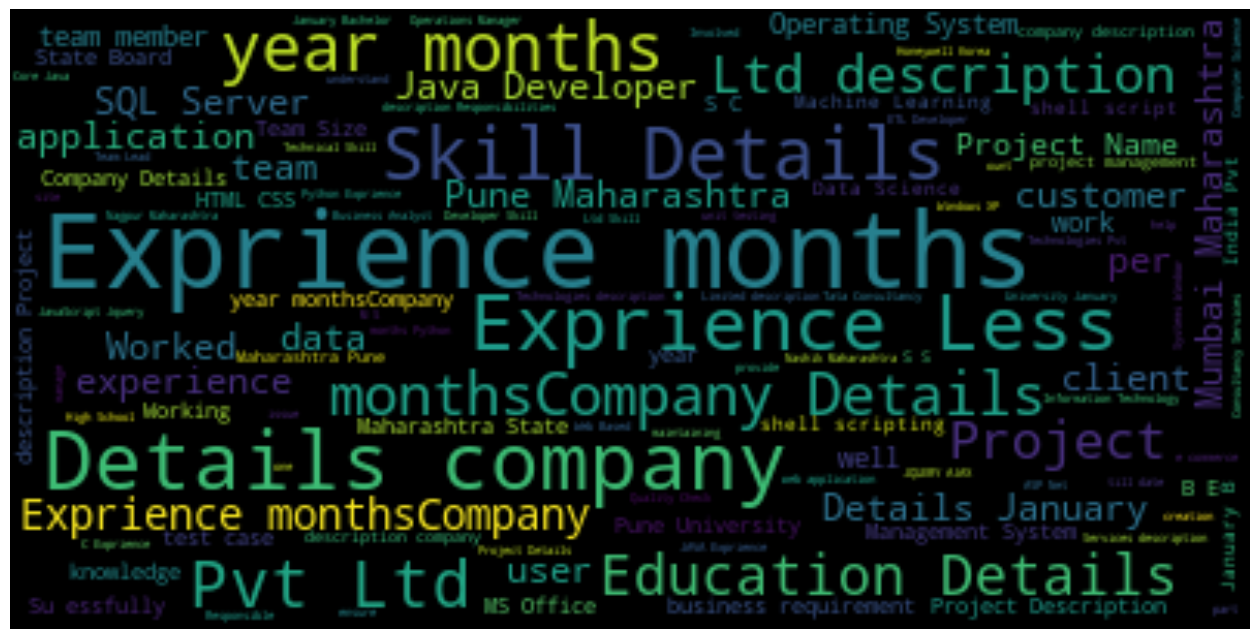

In [28]:
word_cloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(16,16))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [29]:
from sklearn.preprocessing import LabelEncoder


In [34]:
data1 = ['Category']
le = LabelEncoder()
for i in data1:
    df[i] = le.fit_transform(df[i])

In [36]:
df.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills * Programming Languages: Python (pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B.E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...","Areas of Interest Deep Learning, Control Syste..."
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...","Education Details MCA YMCAUST, Faridabad, Hary..."


In [37]:
df.tail()

,Category,Resume,cleaned_resume
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills: Proficient in MS office (Word...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges. Positive...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...","PERSONAL SKILLS Quick learner, Eagerness to le..."
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,23,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [39]:
df.Category.value_counts().head()

15    84
23    70
8     55
20    48
24    45
Name: Category, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


In [42]:
requiredText = df['cleaned_resume'].values
requiredTarget = df['Category'].values
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)


In [43]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,
                                                requiredTarget,
                                                random_state=1,
                                                test_size=0.2,
                                                shuffle=True,
                                                stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(769, 7353)
(193, 7353)


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [45]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)


In [47]:
print('KNC Accuracy Training Data: {:.2f}'.format(clf.score(X_train, y_train)))
print('KNC Accuracy Test Data: {:.2f}'.format(clf.score(X_test, y_test)))


KNC Accuracy Training Data: 0.99
KNC Accuracy Test Data: 0.99


In [55]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       0.86      1.00      0.92         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.